# Creating Fig. 4.11 for Master thesis

In [1]:
%load_ext autoreload
%autoreload 2
import os.path as op
import tempfile

import matplotlib.pyplot as plt


import hnn_core
from hnn_core import simulate_dipole, jones_2009_model
from hnn_core.viz import plot_dipole


import sys
sys.path.append('../code/')
sys.path.append('../code/utils/')
#sys.path.append('../code/sbi/')
#sys.path.append('../../results_cluster/')


import numpy as np
import torch

# visualization
import matplotlib as mpl
import matplotlib.pyplot as plt


import os


import utils.sbi_modulated_functions

# sbi
from sbi import utils as utils
from sbi import analysis as analysis
from sbi.inference.base import infer
from sbi.inference import SNPE, prepare_for_sbi, simulate_for_sbi

from sbi.analysis import conditional_pairplot, conditional_corrcoeff



# import the summary statistics that you want to investigate
from summary_features.calculate_summary_features import calculate_summary_statistics_alternative as alternative_sumstats
from summary_features.calculate_summary_features import calculate_summary_stats_temporal as temporal_sumstats
from summary_features.calculate_summary_features import calculate_summary_stats_number as number_sumstats
from summary_features.calculate_summary_features import calculate_summary_stats_temporal


In [2]:
print(torch.__version__)

1.11.0


In [3]:
## defining neuronal network model

num_params = 17

from utils.simulation_wrapper import set_network_default, SimulationWrapper
sim_wrapper = SimulationWrapper(num_params, noise=False)


In [4]:
window_len = 30


prior_min = [0, 0, 0, 0, 0, 13.3,  0, 0, 0, 0, 0, 51.980, 0, 0, 0, 0, 112.13]
prior_max = [0.927, 0.160, 2.093, 1.0, 1.0, 35.9, 0.000042, 0.039372, 0.025902,  0.480, 0.117, 75.08, 8.633, 4.104, 1.0, 1.0, 162.110]

true_params = torch.tensor([[0.277, 0.0399, 0.6244, 0.3739, 0.0, 18.977, 0.000012, 0.0115, 0.0134,  0.0767, 0.06337, 63.08, 4.6729, 2.33, 0.016733, 0.0679, 120.86]])


prior = utils.torchutils.BoxUniform(low=prior_min, high=prior_max)

#number_simulations = 10
density_estimator = 'nsf'


In [5]:

#assert (prior.event_shape==torch.Size([25]))
from utils import inference

In [6]:
from utils import inference

import pickle
from data_load_writer import *
from data_load_writer import load_from_file as lf


import os

print(os.getcwd())



/home/ubuntu/sbi_for_eeg_data/notebooks


In [7]:
file = '10000sims_17params_05_04_nsf_threshold'
#file = '10000sims_17params_20_04_nsf_threshold_lower_std'

print(os.getcwd())

os.chdir('/home/ubuntu/results')


print(os.getcwd())
  

posterior = torch.load('{}/posterior.pt'.format(file))

obs_real = torch.load('{}/obs_real.pt'.format(file))



/home/ubuntu/sbi_for_eeg_data/notebooks
/home/ubuntu/results


In [8]:
samples_t_100 = posterior.sample((100,))

Drawing 100 posterior samples:   0%|          | 0/100 [00:00<?, ?it/s]

acceptance rate:  1.0


/home/ubuntu/miniconda3/envs/sbi_env/lib/python3.7/site-packages/nflows/transforms/lu.py:81: UserWarning: torch.triangular_solve is deprecated in favor of torch.linalg.solve_triangularand will be removed in a future PyTorch release.
torch.linalg.solve_triangular has its arguments reversed and does not return a copy of one of the inputs.
X = torch.triangular_solve(B, A).solution
should be replaced with
X = torch.linalg.solve_triangular(A, B). (Triggered internally at  /opt/conda/conda-bld/pytorch_1646755861072/work/aten/src/ATen/native/BatchLinearAlgebra.cpp:1672.)
  outputs.t(), lower, upper=False, unitriangular=True


In [9]:
true_params_threshold = torch.tensor([0.08831, 0.01525, 0.19934, 0, 0, 26.61, 
                                     0.000007, 0.006562, 0.004317, 0.080074, 0.019482, 63.53,
                                     1.43884, 0.684013, 0, 0, 137.12])

In [10]:
file = '10000sims_17params_11_04_nsf_supra_ratio'

#file = '10000sims_17params_20_04_nsf_supra_lower_std'

#file = '10000sims_17params_20_04_nsf_supra_001_std'
#file = '10000sims_17params_24_04_nsf_supra_0_std'


thetas = torch.load('{}/thetas.pt'.format(file))

posterior = torch.load('{}/posterior.pt'.format(file))


obs_real2 = torch.load('{}/obs_real.pt'.format(file))

In [11]:
samples_supra_100 = posterior.sample((100,))

Drawing 100 posterior samples:   0%|          | 0/100 [00:00<?, ?it/s]

acceptance rate:  1.0


In [12]:
s_x_s = inference.run_only_sim(samples_supra_100, simulation_wrapper=sim_wrapper, num_workers=8)

param size param size 17
param sizeearly stop param size 200.017 
17
param size  17param sizeearly stop
 
param sizeearly stop17 
17early stopparam size 200.0 
param sizeparam size 17   17200.017
param size 200.0


early stop 200.0
 early stopparam size  
17param size 
 early stop17 
200.0 200.0
early stop 
17

 param size 17 17
param size 
 200.0
17param size 
 17num_params
 17num_params
 num_paramsnum_params  171717

joblib will run over 1 jobs

joblib will run over 1 jobsjoblib will run over 1 jobsnum_params
 
17
num_params joblib will run over 1 jobsjoblib will run over 1 jobs
17num_params [Parallel(n_jobs=8)]: Using backend MultiprocessingBackend with 8 concurrent workers.

17

num_paramsjoblib will run over 1 jobs 
joblib will run over 1 jobs17

joblib will run over 1 jobs
Loading custom mechanism files from /home/ubuntu/miniconda3/envs/sbi_env/lib/python3.7/site-packages/hnn_core/mod/x86_64/.libs/libnrnmech.soLoading custom mechanism files from /home/ubuntu/miniconda3/envs/sbi_e

Building the NEURON model
obs [-0.59760178 -0.59840714 -0.59920666 ... 26.28290651 26.19876278
 26.11460671]obs
 param size[-0.59760178 -0.59840714 -0.59920666 ... 39.56331568 39.46077958
 39.35809604] 
17param size
early stop 200.0 17

param size early stop  200.0
17
param size  17
num_params 17
num_paramsjoblib will run over 1 jobs 17

[Parallel(n_jobs=8)]: Done   6 tasks      | elapsed:  1.7min
[Parallel(n_jobs=8)]: Done   7 tasks      | elapsed:  1.7min
joblib will run over 1 jobs
Building the NEURON model
Building the NEURON model
obs [-0.59760178 -0.59840714 -0.59920666 ... 22.86151378 22.78314327
 22.70477086]
param size 17
early stop 200.0
param size  17
Building the NEURON model
num_params 17
[Parallel(n_jobs=8)]: Done   8 tasks      | elapsed:  1.7min
joblib will run over 1 jobs
Building the NEURON model
Building the NEURON model
[Done]
running trial 1 on 1 cores
Simulation time: 0.03 ms...
[Done]
running trial 1 on 1 cores
Simulation time: 0.03 ms...
[Done]
running trial 1 o

Simulation time: 10.0 ms...
Simulation time: 10.0 ms...
Simulation time: 20.0 ms...
[Done]
running trial 1 on 1 cores
Simulation time: 0.03 ms...
Simulation time: 10.0 ms...
Simulation time: 20.0 ms...
Simulation time: 10.0 ms...
[Done]
running trial 1 on 1 cores
Simulation time: 0.03 ms...
Simulation time: 20.0 ms...
Simulation time: 20.0 ms...
Simulation time: 30.0 ms...
Simulation time: 10.0 ms...
Simulation time: 20.0 ms...
Simulation time: 30.0 ms...
Simulation time: 20.0 ms...
Simulation time: 10.0 ms...
Simulation time: 30.0 ms...
Simulation time: 30.0 ms...
Simulation time: 40.0 ms...
Simulation time: 20.0 ms...
Simulation time: 30.0 ms...
Simulation time: 40.0 ms...
Simulation time: 30.0 ms...
Simulation time: 20.0 ms...
Simulation time: 40.0 ms...
Simulation time: 40.0 ms...
Simulation time: 30.0 ms...
Simulation time: 50.0 ms...
Simulation time: 40.0 ms...
Simulation time: 50.0 ms...
Simulation time: 30.0 ms...
Simulation time: 40.0 ms...
Simulation time: 50.0 ms...
Simulati

Simulation time: 50.0 ms...
Simulation time: 80.0 ms...
Simulation time: 60.0 ms...
Simulation time: 50.0 ms...
Simulation time: 60.0 ms...
Simulation time: 70.0 ms...
Simulation time: 60.0 ms...
Simulation time: 90.0 ms...
Simulation time: 80.0 ms...Simulation time: 60.0 ms...

Simulation time: 70.0 ms...
Simulation time: 60.0 ms...
Simulation time: 70.0 ms...
Simulation time: 100.0 ms...
Simulation time: 80.0 ms...
Simulation time: 70.0 ms...
Simulation time: 70.0 ms...
Simulation time: 90.0 ms...
Simulation time: 80.0 ms...
Simulation time: 70.0 ms...
Simulation time: 110.0 ms...
Simulation time: 80.0 ms...
Simulation time: 90.0 ms...
Simulation time: 80.0 ms...
Simulation time: 80.0 ms...
Simulation time: 100.0 ms...
Simulation time: 90.0 ms...
Simulation time: 120.0 ms...
Simulation time: 80.0 ms...
Simulation time: 90.0 ms...
Simulation time: 100.0 ms...
Simulation time: 90.0 ms...
Simulation time: 90.0 ms...
Simulation time: 110.0 ms...
Simulation time: 100.0 ms...
Simulation ti

Simulation time: 120.0 ms...
Simulation time: 110.0 ms...
Simulation time: 100.0 ms...
Simulation time: 170.0 ms...
Simulation time: 120.0 ms...
Simulation time: 110.0 ms...
Simulation time: 120.0 ms...
Simulation time: 110.0 ms...
Simulation time: 130.0 ms...
Simulation time: 120.0 ms...
Simulation time: 110.0 ms...
Simulation time: 180.0 ms...
Simulation time: 130.0 ms...
Simulation time: 130.0 ms...
Simulation time: 120.0 ms...
Simulation time: 120.0 ms...
Simulation time: 140.0 ms...
Simulation time: 130.0 ms...
Simulation time: 120.0 ms...
Simulation time: 190.0 ms...
Simulation time: 140.0 ms...
Simulation time: 140.0 ms...
Simulation time: 130.0 ms...
Simulation time: 130.0 ms...
Simulation time: 150.0 ms...
Simulation time: 140.0 ms...Simulation time: 130.0 ms...

obs [-0.59760178 -0.59840714 -0.59920666 ... 31.31485798 31.22587167
 31.13685743]
param size 17
early stop 200.0
param size  17
num_params 17
[Parallel(n_jobs=8)]: Done  33 tasks      | elapsed:  7.9min
joblib will r

Simulation time: 150.0 ms...
Simulation time: 150.0 ms...
Simulation time: 150.0 ms...
Simulation time: 160.0 ms...
[Done]
running trial 1 on 1 cores
Simulation time: 0.03 ms...
Simulation time: 170.0 ms...
Simulation time: 150.0 ms...
Simulation time: 180.0 ms...
Simulation time: 160.0 ms...
Simulation time: 160.0 ms...
Simulation time: 160.0 ms...
Simulation time: 170.0 ms...
Simulation time: 10.0 ms...
Simulation time: 160.0 ms...
Simulation time: 180.0 ms...
Simulation time: 190.0 ms...
Simulation time: 170.0 ms...
Simulation time: 170.0 ms...
Simulation time: 170.0 ms...
Simulation time: 180.0 ms...
Simulation time: 20.0 ms...
Simulation time: 170.0 ms...
Simulation time: 190.0 ms...
obs [-0.59760178 -0.59840714 -0.59920666 ... 26.64558396 26.56204435
 26.47852485]
param size 17
early stop 200.0
param size  17
num_params 17
joblib will run over 1 jobs[Parallel(n_jobs=8)]: Done  42 tasks      | elapsed: 10.0min

Building the NEURON model
Simulation time: 180.0 ms...
Simulation time

Building the NEURON model
Building the NEURON model
Simulation time: 180.0 ms...
Simulation time: 180.0 ms...
obs [-0.59760178 -0.59840714 -0.59920666 ... 29.56656967 29.46993213
 29.37319709]
param size 17
early stop 200.0
param size  17
num_params 17
joblib will run over 1 jobs
[Parallel(n_jobs=8)]: Done  52 tasks      | elapsed: 11.9min
Simulation time: 190.0 ms...
Simulation time: 190.0 ms...
Building the NEURON model
Simulation time: 40.0 ms...
Simulation time: 190.0 ms...
Simulation time: 190.0 ms...
obs [-0.59760178 -0.59840714 -0.59920666 ... 24.19912663 24.12639894
 24.05374043]
param size 17
early stop 200.0
param size  17
num_params 17
joblib will run over 1 jobs
[Parallel(n_jobs=8)]: Done  53 tasks      | elapsed: 11.9min
obs [-0.59760178 -0.59840714 -0.59920666 ... 26.68116741 26.59173603
 26.5023966 ]
param size 17
early stop 200.0
param size  17
num_params 17
joblib will run over 1 jobs
[Parallel(n_jobs=8)]: Done  54 tasks      | elapsed: 11.9min
Building the NEURON mode

joblib will run over 1 jobs
[Parallel(n_jobs=8)]: Done  63 tasks      | elapsed: 13.7min
obs [-0.59760178 -0.59840714 -0.59920666 ... 21.25955409 21.19620674
 21.13284692]
param size 17
early stop 200.0
param size  17
num_params Building the NEURON model17

joblib will run over 1 jobs
[Parallel(n_jobs=8)]: Done  64 tasks      | elapsed: 13.7min
[Done]
running trial 1 on 1 cores
Simulation time: 0.03 ms...
Building the NEURON model
Simulation time: 60.0 ms...
Simulation time: 20.0 ms...
Simulation time: 10.0 ms...
[Done]
running trial 1 on 1 cores
Simulation time: 30.0 ms...
[Done]
Simulation time: 0.03 ms...running trial 1 on 1 cores

Simulation time: 0.03 ms...
Simulation time: 70.0 ms...
[Done]
running trial 1 on 1 cores
Simulation time: 0.03 ms...
Simulation time: 10.0 ms...
Simulation time: 40.0 ms...
[Done]
running trial 1 on 1 cores
Simulation time: 20.0 ms...
Simulation time: 0.03 ms...
Simulation time: 10.0 ms...
[Done]
running trial 1 on 1 cores
Simulation time: 0.03 ms...
Sim

Simulation time: 0.03 ms...
Simulation time: 20.0 ms...
Simulation time: 30.0 ms...
Simulation time: 110.0 ms...
Simulation time: 20.0 ms...
Simulation time: 40.0 ms...
Simulation time: 40.0 ms...
Simulation time: 70.0 ms...
Simulation time: 10.0 ms...
Simulation time: 30.0 ms...
Simulation time: 40.0 ms...
Simulation time: 120.0 ms...
Simulation time: 30.0 ms...
Simulation time: 50.0 ms...
Simulation time: 50.0 ms...
Simulation time: 80.0 ms...
Simulation time: 20.0 ms...
Simulation time: 40.0 ms...
Simulation time: 50.0 ms...
Simulation time: 130.0 ms...
Simulation time: 40.0 ms...
Simulation time: 60.0 ms...
Simulation time: 60.0 ms...
Simulation time: 30.0 ms...
Simulation time: 90.0 ms...
Simulation time: 50.0 ms...
Simulation time: 60.0 ms...
Simulation time: 140.0 ms...
Simulation time: 50.0 ms...
Simulation time: 70.0 ms...
Simulation time: 40.0 ms...
Simulation time: 70.0 ms...Simulation time: 100.0 ms...

Simulation time: 60.0 ms...
Simulation time: 70.0 ms...
Simulation time

Simulation time: 60.0 ms...
Simulation time: 90.0 ms...
Simulation time: 170.0 ms...
Simulation time: 70.0 ms...
Simulation time: 70.0 ms...
Simulation time: 90.0 ms...
Simulation time: 140.0 ms...
Simulation time: 100.0 ms...
Simulation time: 70.0 ms...
Simulation time: 100.0 ms...
Simulation time: 180.0 ms...
Simulation time: 80.0 ms...
Simulation time: 80.0 ms...
Simulation time: 100.0 ms...
Simulation time: 150.0 ms...
Simulation time: 110.0 ms...
Simulation time: 80.0 ms...
Simulation time: 110.0 ms...
Simulation time: 190.0 ms...
Simulation time: 90.0 ms...
Simulation time: 90.0 ms...
Simulation time: 160.0 ms...
Simulation time: 110.0 ms...
Simulation time: 120.0 ms...
Simulation time: 90.0 ms...
Simulation time: 120.0 ms...
obs [-0.59760178 -0.59840714 -0.59920666 ... 32.42480954 32.32978885
 32.23474381]
param size 17
early stop 200.0
param size  17
[Parallel(n_jobs=8)]: Done  81 tasks      | elapsed: 18.2min
num_params 17
joblib will run over 1 jobs
Simulation time: 100.0 ms.

Simulation time: 140.0 ms...
Simulation time: 190.0 ms...
Simulation time: 130.0 ms...
[Done]
running trial 1 on 1 cores
Simulation time: 0.03 ms...
Simulation time: 120.0 ms...
Simulation time: 110.0 ms...
Simulation time: 150.0 ms...
Simulation time: 150.0 ms...
Simulation time: 110.0 ms...
obs [-0.59760178 -0.59840714 -0.59920666 ... 30.11856837 30.02834329
 29.93814448]
Simulation time: 10.0 ms...
param size 17
early stop 200.0
param size  17
num_params Simulation time: 140.0 ms...
17
joblib will run over 1 jobs
Simulation time: 130.0 ms...
Building the NEURON model
Simulation time: 120.0 ms...
Simulation time: 160.0 ms...
Simulation time: 120.0 ms...
Simulation time: 160.0 ms...
Simulation time: 150.0 ms...
Simulation time: 20.0 ms...
Simulation time: 140.0 ms...
Simulation time: 130.0 ms...
Simulation time: 130.0 ms...
Simulation time: 170.0 ms...
Simulation time: 170.0 ms...
Simulation time: 160.0 ms...
Simulation time: 30.0 ms...
[Done]
running trial 1 on 1 cores
Simulation tim

In [13]:
s_x_t = inference.run_only_sim(samples_t_100, simulation_wrapper=sim_wrapper, num_workers=8)

param sizeparam size 17 param size
param size early stop17param size17 
200.0param size 
early stop
 param size  param size17 17 17 200.017early stop


17param size param size early stop
 200.0 17

200.0param size 

 param size early stop17 

17
early stopearly stop early stop  17  200.0200.0200.0200.0


param size 

param size param size param size    171717


 17
num_params num_params num_params1717 

17num_params
joblib will run over 1 jobs 17joblib will run over 1 jobs

joblib will run over 1 jobs

num_paramsjoblib will run over 1 jobs 
17num_params num_params17 
joblib will run over 1 jobs17

[Parallel(n_jobs=8)]: Using backend MultiprocessingBackend with 8 concurrent workers.

joblib will run over 1 jobs
joblib will run over 1 jobs
num_params 17
joblib will run over 1 jobs
Loading custom mechanism files from /home/ubuntu/miniconda3/envs/sbi_env/lib/python3.7/site-packages/hnn_core/mod/x86_64/.libs/libnrnmech.soLoading custom mechanism files from /home/ubuntu/miniconda3/envs/sbi_e

obs [-0.59760178 -0.59840714 -0.59920666 ... 33.43458545 33.33862134
 33.24268913]
param size 17
early stop 200.0
param size  17
Building the NEURON model
num_params 17
obs [-0.59760178 -0.59840714 -0.59920666 ... 35.71606058 35.59264039
 35.46925252]
param sizejoblib will run over 1 jobs
 17
early stop 200.0
param size  17
[Parallel(n_jobs=8)]: Done   6 tasks      | elapsed:  1.7min
[Parallel(n_jobs=8)]: Done   7 tasks      | elapsed:  1.7min
num_params 17
joblib will run over 1 jobs
Building the NEURON model
Building the NEURON model
obs [-0.59760178 -0.59840714 -0.59920666 ... 39.51118524 39.39307829
 39.27493429]
param size 17
early stop 200.0
param size  17
num_params 17
joblib will run over 1 jobs
[Parallel(n_jobs=8)]: Done   8 tasks      | elapsed:  1.7min
Building the NEURON model
[Done]
running trial 1 on 1 cores
Simulation time: 0.03 ms...
[Done]
running trial 1 on 1 cores
Simulation time: 0.03 ms...
[Done]
running trial 1 on 1 cores
Simulation time: 0.03 ms...
[Done]
running

Simulation time: 0.03 ms...
[Done]
running trial 1 on 1 cores
Simulation time: 0.03 ms...
Simulation time: 10.0 ms...
Simulation time: 10.0 ms...
Simulation time: 20.0 ms...
Simulation time: 10.0 ms...
Simulation time: 20.0 ms...
Simulation time: 20.0 ms...
Simulation time: 10.0 ms...
Simulation time: 10.0 ms...
Simulation time: 20.0 ms...
Simulation time: 20.0 ms...
Simulation time: 20.0 ms...
Simulation time: 30.0 ms...
Simulation time: 30.0 ms...
Simulation time: 30.0 ms...
Simulation time: 20.0 ms...
Simulation time: 20.0 ms...
Simulation time: 30.0 ms...
Simulation time: 30.0 ms...
Simulation time: 40.0 ms...
Simulation time: 30.0 ms...
Simulation time: 40.0 ms...
Simulation time: 40.0 ms...
Simulation time: 30.0 ms...
Simulation time: 30.0 ms...
Simulation time: 40.0 ms...
Simulation time: 50.0 ms...
Simulation time: 40.0 ms...
Simulation time: 40.0 ms...
Simulation time: 50.0 ms...
Simulation time: 50.0 ms...
Simulation time: 40.0 ms...
Simulation time: 50.0 ms...
Simulation tim

Simulation time: 50.0 ms...
Simulation time: 80.0 ms...
Simulation time: 70.0 ms...
Simulation time: 50.0 ms...
Simulation time: 70.0 ms...
Simulation time: 60.0 ms...
Simulation time: 80.0 ms...
Simulation time: 80.0 ms...
Simulation time: 90.0 ms...
Simulation time: 60.0 ms...
Simulation time: 80.0 ms...
Simulation time: 60.0 ms...
Simulation time: 80.0 ms...
Simulation time: 70.0 ms...
Simulation time: 90.0 ms...
Simulation time: 90.0 ms...
Simulation time: 100.0 ms...
Simulation time: 70.0 ms...
Simulation time: 90.0 ms...
Simulation time: 90.0 ms...
Simulation time: 70.0 ms...
Simulation time: 80.0 ms...
Simulation time: 100.0 ms...
Simulation time: 100.0 ms...
Simulation time: 110.0 ms...
Simulation time: 80.0 ms...
Simulation time: 100.0 ms...
Simulation time: 100.0 ms...
Simulation time: 80.0 ms...
Simulation time: 110.0 ms...
Simulation time: 90.0 ms...
Simulation time: 110.0 ms...
Simulation time: 120.0 ms...
Simulation time: 90.0 ms...
Simulation time: 110.0 ms...
Simulation

Simulation time: 140.0 ms...
Simulation time: 90.0 ms...
Simulation time: 140.0 ms...
Simulation time: 140.0 ms...
Simulation time: 120.0 ms...
Simulation time: 110.0 ms...
Simulation time: 150.0 ms...
Simulation time: 100.0 ms...
Simulation time: 150.0 ms...
Simulation time: 100.0 ms...
Simulation time: 150.0 ms...
Simulation time: 150.0 ms...
Simulation time: 130.0 ms...
Simulation time: 120.0 ms...
Simulation time: 160.0 ms...
Simulation time: 160.0 ms...
Simulation time: 110.0 ms...
Simulation time: 110.0 ms...
Simulation time: 160.0 ms...
Simulation time: 160.0 ms...
Simulation time: 140.0 ms...
Simulation time: 130.0 ms...
Simulation time: 170.0 ms...
Simulation time: 170.0 ms...
Simulation time: 120.0 ms...
Simulation time: 120.0 ms...
Simulation time: 170.0 ms...
Simulation time: 150.0 ms...
Simulation time: 170.0 ms...
Simulation time: 180.0 ms...
Simulation time: 140.0 ms...
Simulation time: 180.0 ms...
Simulation time: 130.0 ms...
Simulation time: 180.0 ms...
Simulation time

joblib will run over 1 jobs
[Parallel(n_jobs=8)]: Done  41 tasks      | elapsed:  9.7min
Simulation time: 180.0 ms...
Building the NEURON model
obs [-0.59760178 -0.59840714 -0.59920666 ... 33.65132842 33.54859434
 33.44583642]
param size 17
early stop 200.0
param size  17
num_params 17
joblib will run over 1 jobs
[Parallel(n_jobs=8)]: Done  42 tasks      | elapsed:  9.7min
Simulation time: 180.0 ms...
Simulation time: 140.0 ms...
Building the NEURON model
Simulation time: 130.0 ms...
Simulation time: 160.0 ms...
Simulation time: 190.0 ms...
Simulation time: 190.0 ms...
Simulation time: 190.0 ms...
Simulation time: 150.0 ms...
Simulation time: 140.0 ms...
Simulation time: 170.0 ms...
obs [-0.59760178 -0.59840714 -0.59920666 ... 31.81524031 31.68939737
 31.56370353]
param size 17
early stop 200.0
param size  17
num_params 17
joblib will run over 1 jobs
[Parallel(n_jobs=8)]: Done  43 tasks      | elapsed:  9.8min
obs [-0.59760178 -0.59840714 -0.59920666 ... 24.42378384 24.34131082
 24.258

Simulation time: 160.0 ms...
Simulation time: 140.0 ms...
Simulation time: 180.0 ms...
Simulation time: 30.0 ms...
obs [-0.59760178 -0.59840714 -0.59920666 ... 29.89983537 29.80367916
 29.70758227]
param size 17
early stop 200.0
param size  17
num_params 17
joblib will run over 1 jobs
[Parallel(n_jobs=8)]: Done  53 tasks      | elapsed: 11.6min
Simulation time: 170.0 ms...
Building the NEURON model
[Done]
running trial 1 on 1 cores
[Done]
running trial 1 on 1 cores
Simulation time: 0.03 ms...
Simulation time: 0.03 ms...
[Done]
running trial 1 on 1 cores
Simulation time: 0.03 ms...
Simulation time: 150.0 ms...
Simulation time: 190.0 ms...
Simulation time: 40.0 ms...
Simulation time: 180.0 ms...
Simulation time: 10.0 ms...
Simulation time: 10.0 ms...
Simulation time: 10.0 ms...
Simulation time: 160.0 ms...
obs [-0.59760178 -0.59840714 -0.59920666 ... 32.61488446 32.51458718
 32.41431213]
param size 17
early stop 200.0
param size  17
num_params 17
joblib will run over 1 jobs
[Parallel(n_j

running trial 1 on 1 cores
Simulation time: 0.03 ms...
Simulation time: 30.0 ms...
[Done]
running trial 1 on 1 cores
Simulation time: 0.03 ms...
Simulation time: 40.0 ms...
Simulation time: 60.0 ms...
Simulation time: 30.0 ms...
obs [-0.59760178 -0.59840714 -0.59920666 ... 28.50730161 28.40760499
 28.30791933]
param size 17
early stop 200.0
param size  17
num_params 17
joblib will run over 1 jobs
[Parallel(n_jobs=8)]: Done  63 tasks      | elapsed: 13.6min
Simulation time: 180.0 ms...
Building the NEURON model
Simulation time: 40.0 ms...
Simulation time: 10.0 ms...
Simulation time: 10.0 ms...
Simulation time: 50.0 ms...
Simulation time: 40.0 ms...
Simulation time: 70.0 ms...
Simulation time: 190.0 ms...
Simulation time: 50.0 ms...
Simulation time: 20.0 ms...
Simulation time: 20.0 ms...
Simulation time: 60.0 ms...
Simulation time: 50.0 ms...
Simulation time: 80.0 ms...
obs [-0.59760178 -0.59840714 -0.59920666 ... 35.88098665 35.76325761
 35.64561608]
param size 17
early stop 200.0
param

 28.55190442]
param size 17
early stop 200.0
param size  17
num_params 17
joblib will run over 1 jobs
[Parallel(n_jobs=8)]: Done  72 tasks      | elapsed: 15.6min
Simulation time: 40.0 ms...
Building the NEURON model
Simulation time: 80.0 ms...
Simulation time: 30.0 ms...
Simulation time: 80.0 ms...
Simulation time: 40.0 ms...
Simulation time: 90.0 ms...
Simulation time: 90.0 ms...
Simulation time: 50.0 ms...
Simulation time: 40.0 ms...
Simulation time: 90.0 ms...
Simulation time: 90.0 ms...
Simulation time: 50.0 ms...
Simulation time: 100.0 ms...
Simulation time: 100.0 ms...
Simulation time: 60.0 ms...
[Done]
running trial 1 on 1 cores
Simulation time: 0.03 ms...
Simulation time: 50.0 ms...
Simulation time: 100.0 ms...
Simulation time: 100.0 ms...
Simulation time: 60.0 ms...
Simulation time: 110.0 ms...
Simulation time: 110.0 ms...
Simulation time: 70.0 ms...
Simulation time: 10.0 ms...
Simulation time: 110.0 ms...
Simulation time: 110.0 ms...
Simulation time: 60.0 ms...
Simulation ti

Simulation time: 130.0 ms...
Simulation time: 50.0 ms...
Simulation time: 80.0 ms...
Simulation time: 130.0 ms...
Simulation time: 70.0 ms...
Simulation time: 80.0 ms...
Simulation time: 140.0 ms...
Simulation time: 140.0 ms...
Simulation time: 140.0 ms...
Simulation time: 60.0 ms...
Simulation time: 140.0 ms...
Simulation time: 90.0 ms...
Simulation time: 90.0 ms...
Simulation time: 80.0 ms...
Simulation time: 150.0 ms...
Simulation time: 150.0 ms...
Simulation time: 150.0 ms...
Simulation time: 150.0 ms...
Simulation time: 70.0 ms...
Simulation time: 100.0 ms...
Simulation time: 100.0 ms...
Simulation time: 90.0 ms...
Simulation time: 160.0 ms...
Simulation time: 160.0 ms...
Simulation time: 160.0 ms...
Simulation time: 160.0 ms...
Simulation time: 80.0 ms...
Simulation time: 110.0 ms...
Simulation time: 110.0 ms...
Simulation time: 170.0 ms...
Simulation time: 100.0 ms...
Simulation time: 170.0 ms...
Simulation time: 170.0 ms...
Simulation time: 170.0 ms...
Simulation time: 120.0 ms

param size 17
early stopSimulation time: 170.0 ms... 
200.0
param size  17
num_params 17obs
 joblib will run over 1 jobs
[-0.59760178 -0.59840714 -0.59920666 ... 30.6697574  30.5644008
 30.45906506]
param size 17[Parallel(n_jobs=8)]: Done  89 tasks      | elapsed: 19.8min

early stop 200.0
param size  17
num_params 17
joblib will run over 1 jobs
Simulation time: 120.0 ms...
Building the NEURON model
Building the NEURON model
Simulation time: 110.0 ms...
obs [-0.59760178 -0.59840714 -0.59920666 ... 29.37762296 29.27797483
 29.17846229]
param size 17
early stop 200.0
param size  17
num_params 17
joblib will run over 1 jobs
[Parallel(n_jobs=8)]: Done  91 out of 100 | elapsed: 19.8min remaining:  2.0min
Simulation time: 100.0 ms...
Building the NEURON model
Simulation time: 140.0 ms...
Simulation time: 180.0 ms...
Simulation time: 130.0 ms...
Simulation time: 120.0 ms...
Simulation time: 110.0 ms...
Simulation time: 150.0 ms...
Simulation time: 190.0 ms...
Simulation time: 130.0 ms...
Simu

In [14]:
### sample from prior now
num_samples = 100
samples_prior = []


for i in range(num_samples):
    sample = prior.sample()
    samples_prior.append(sample)
    

In [15]:
    
s_x_prior = inference.run_only_sim(samples_prior, sim_wrapper, num_workers=8)

param size param size17param size 
17early stop  param size
200.017param size early stop
param size
17 early stop 200.0  param size param size
param size17200.0 
17early stop
param size 
early stop 
 200.0 17  
200.017
param size 17 17
param size 
17
early stop

early stopearly stopparam size    200.0
param size  17
200.0 17
 200.0
17

param size param size  17
 17
num_paramsnum_params num_params 1717
 17
num_params 
joblib will run over 1 jobsnum_params17num_params
 
joblib will run over 1 jobs17 joblib will run over 1 jobs

17num_params

joblib will run over 1 jobs
 joblib will run over 1 jobs
joblib will run over 1 jobs17

num_params 17[Parallel(n_jobs=8)]: Using backend MultiprocessingBackend with 8 concurrent workers.

joblib will run over 1 jobsjoblib will run over 1 jobs

Loading custom mechanism files from /home/ubuntu/miniconda3/envs/sbi_env/lib/python3.7/site-packages/hnn_core/mod/x86_64/.libs/libnrnmech.soLoading custom mechanism files from /home/ubuntu/miniconda3/envs/sbi_e

Simulation time: 190.0 ms...
Building the NEURON model
[Done]
running trial 1 on 1 cores
Simulation time: 0.03 ms...
obs [ 0.18264277  0.1903369   0.19807469 ... 32.24325986 32.14067666
 32.03809636]
param size 17
early stop 200.0
param size  17
num_params 17
joblib will run over 1 jobs
[Parallel(n_jobs=8)]: Done   6 tasks      | elapsed:  1.7min
[Done]
running trial 1 on 1 cores
obs [-0.59760178 -0.59840714 -0.59920666 ... 15.63328256 15.58487743
 15.53647455]
Simulation time: 0.03 ms...
param size 17
early stop 200.0
param size  17
Building the NEURON model
num_params 17
joblib will run over 1 jobs
[Parallel(n_jobs=8)]: Done   7 tasks      | elapsed:  1.7min
[Done]
running trial 1 on 1 cores
Simulation time: 10.0 ms...obs 
[-0.44117343 -0.43851057 -0.43565572 ... 23.95187473 23.87868201
 23.80550513]Simulation time: 0.03 ms...

param size 17
early stop 200.0
param size  17
num_params 17
joblib will run over 1 jobs
[Parallel(n_jobs=8)]: Done   8 tasks      | elapsed:  1.7min
Building 

Simulation time: 20.0 ms...
[Done]
running trial 1 on 1 cores
Simulation time: 0.03 ms...
[Done]
running trial 1 on 1 cores
Simulation time: 0.03 ms...
Simulation time: 50.0 ms...
Simulation time: 20.0 ms...
Simulation time: 20.0 ms...
[Done]
running trial 1 on 1 cores
Simulation time: 0.03 ms...
Simulation time: 30.0 ms...
Simulation time: 10.0 ms...
[Done]
running trial 1 on 1 cores
Simulation time: 10.0 ms...
Simulation time: 0.03 ms...
Simulation time: 60.0 ms...
Simulation time: 30.0 ms...
Simulation time: 10.0 ms...
Simulation time: 30.0 ms...
Simulation time: 20.0 ms...
Simulation time: 20.0 ms...
Simulation time: 10.0 ms...
Simulation time: 40.0 ms...
Simulation time: 70.0 ms...
Simulation time: 40.0 ms...
Simulation time: 20.0 ms...
Simulation time: 30.0 ms...
Simulation time: 40.0 ms...
Simulation time: 30.0 ms...
Simulation time: 20.0 ms...
Simulation time: 80.0 ms...
Simulation time: 50.0 ms...
Simulation time: 50.0 ms...
Simulation time: 40.0 ms...
Simulation time: 30.0 ms

Simulation time: 50.0 ms...
Simulation time: 40.0 ms...
Simulation time: 70.0 ms...
Simulation time: 60.0 ms...
Simulation time: 70.0 ms...
Simulation time: 60.0 ms...
Simulation time: 130.0 ms...
Simulation time: 40.0 ms...
Simulation time: 60.0 ms...
Simulation time: 50.0 ms...
Simulation time: 80.0 ms...
Simulation time: 70.0 ms...
Simulation time: 80.0 ms...
Simulation time: 140.0 ms...
Simulation time: 70.0 ms...
Simulation time: 50.0 ms...
Simulation time: 70.0 ms...
Simulation time: 80.0 ms...
Simulation time: 60.0 ms...
Simulation time: 90.0 ms...
Simulation time: 150.0 ms...
Simulation time: 90.0 ms...
Simulation time: 60.0 ms...
Simulation time: 80.0 ms...
Simulation time: 80.0 ms...
Simulation time: 90.0 ms...
Simulation time: 100.0 ms...
Simulation time: 70.0 ms...
Simulation time: 160.0 ms...
Simulation time: 70.0 ms...
Simulation time: 100.0 ms...
Simulation time: 90.0 ms...
Simulation time: 90.0 ms...
Simulation time: 100.0 ms...
Simulation time: 170.0 ms...
Simulation t

Simulation time: 90.0 ms...
Simulation time: 80.0 ms...
Simulation time: 90.0 ms...
Simulation time: 130.0 ms...
Simulation time: 140.0 ms...
obs [-0.59760178 -0.59840714 -0.59920666 ... 10.24060227 10.20727889
 10.17397172]
param size 17
early stop 200.0
param size  17
num_params 17
joblib will run over 1 jobs
[Parallel(n_jobs=8)]: Done  33 tasks      | elapsed:  7.8min
Simulation time: 130.0 ms...
Simulation time: 110.0 ms...
Building the NEURON model
Simulation time: 100.0 ms...
Simulation time: 100.0 ms...
Simulation time: 90.0 ms...
Simulation time: 140.0 ms...
Simulation time: 150.0 ms...
Simulation time: 140.0 ms...
Simulation time: 110.0 ms...
Simulation time: 120.0 ms...
Simulation time: 110.0 ms...
Simulation time: 100.0 ms...
Simulation time: 160.0 ms...
Simulation time: 150.0 ms...
[Done]
running trial 1 on 1 cores
Simulation time: 0.03 ms...
Simulation time: 120.0 ms...
Simulation time: 110.0 ms...
Simulation time: 150.0 ms...
Simulation time: 130.0 ms...
Simulation time: 

Simulation time: 190.0 ms...
Simulation time: 120.0 ms...
Simulation time: 160.0 ms...
Simulation time: 180.0 ms...
Simulation time: 140.0 ms...
Simulation time: 140.0 ms...
Simulation time: 140.0 ms...
obs [-0.16303265 -0.15615544 -0.14921005 ... 38.93903807 38.8158559
 38.69267355]
param size 17
early stop 200.0
param size  17
num_params 17
joblib will run over 1 jobs
[Parallel(n_jobs=8)]: Done  42 tasks      | elapsed:  9.8min
Simulation time: 40.0 ms...
Simulation time: 130.0 ms...
Building the NEURON model
Simulation time: 170.0 ms...
Simulation time: 190.0 ms...
Simulation time: 150.0 ms...
Simulation time: 150.0 ms...
Simulation time: 150.0 ms...
Simulation time: 50.0 ms...
Simulation time: 140.0 ms...
obs [-0.59760178 -0.59840714 -0.59920666 ... 34.70830817 34.59379829
 34.47933558]
param size 17
early stop 200.0
param size  17
num_params 17
joblib will run over 1 jobs
[Parallel(n_jobs=8)]: Done  43 tasks      | elapsed:  9.9min
Simulation time: 160.0 ms...
Simulation time: 180

Simulation time: 180.0 ms...
Simulation time: 150.0 ms...
Simulation time: 30.0 ms...
Simulation time: 150.0 ms...
Simulation time: 80.0 ms...
Simulation time: 160.0 ms...
Simulation time: 10.0 ms...
Simulation time: 190.0 ms...
Simulation time: 190.0 ms...
Simulation time: 40.0 ms...
Simulation time: 160.0 ms...
Simulation time: 90.0 ms...
Simulation time: 160.0 ms...
Simulation time: 20.0 ms...
Simulation time: 170.0 ms...
obs [-0.59760178 -0.59840714 -0.59920666 ... 28.45164677 28.35807386
 28.26454927]
param size 17
early stop 200.0
param size  17
num_params 17
joblib will run over 1 jobs
[Parallel(n_jobs=8)]: Done  52 tasks      | elapsed: 11.9min
obs [-0.59760178 -0.59840714 -0.59920666 ... 28.24611809 28.14525605
 28.04438498]
param size 17
early stop 200.0
param size  17
num_params 17
joblib will run over 1 jobs
[Parallel(n_jobs=8)]: Done  53 tasks      | elapsed: 11.9min
Simulation time: 50.0 ms...
Building the NEURON model
Building the NEURON model
Simulation time: 100.0 ms..

Simulation time: 170.0 ms...
Simulation time: 170.0 ms...
Simulation time: 180.0 ms...
Simulation time: 50.0 ms...
Simulation time: 10.0 ms...
[Done]
running trial 1 on 1 cores
Simulation time: 0.03 ms...
Simulation time: 90.0 ms...
Simulation time: 140.0 ms...
Simulation time: 180.0 ms...
Simulation time: 190.0 ms...
Simulation time: 180.0 ms...
Simulation time: 60.0 ms...
Simulation time: 20.0 ms...
Simulation time: 10.0 ms...
Simulation time: 100.0 ms...
Simulation time: 150.0 ms...
Simulation time: 190.0 ms...
obs [ 0.17927392  0.18693842  0.19469632 ... 52.6446773  52.46862256
 52.29264714]
param size 17
early stop 200.0
param size  17
num_params 17
joblib will run over 1 jobs
[Parallel(n_jobs=8)]: Done  62 tasks      | elapsed: 13.9min
Simulation time: 190.0 ms...
Simulation time: 30.0 ms...
Building the NEURON model
Simulation time: 70.0 ms...
Simulation time: 110.0 ms...
Simulation time: 20.0 ms...
Simulation time: 160.0 ms...
obs [-0.59760178 -0.59840714 -0.59920666 ... 24.038

Simulation time: 90.0 ms...
Simulation time: 160.0 ms...
Simulation time: 190.0 ms...
Simulation time: 130.0 ms...
Simulation time: 10.0 ms...
Simulation time: 60.0 ms...
[Done]
Simulation time: 20.0 ms...running trial 1 on 1 cores

Simulation time: 100.0 ms...
Simulation time: 0.03 ms...
Simulation time: 170.0 ms...
obs [-0.59760178 -0.59840714 -0.59920666 ... 45.41732273 45.25566482
 45.09417645]
param size Simulation time: 140.0 ms...17

early stop 200.0
param size  17
num_params 17[Parallel(n_jobs=8)]: Done  72 tasks      | elapsed: 15.9min

joblib will run over 1 jobs
Simulation time: 20.0 ms...
Building the NEURON model
Simulation time: 70.0 ms...
Simulation time: 30.0 ms...
Simulation time: 110.0 ms...
Simulation time: 10.0 ms...
Simulation time: 150.0 ms...
Simulation time: 180.0 ms...
Simulation time: 30.0 ms...
Simulation time: 80.0 ms...
Simulation time: 40.0 ms...
Simulation time: 120.0 ms...
Simulation time: 20.0 ms...
Simulation time: 160.0 ms...
Simulation time: 190.0 ms

running trial 1 on 1 cores
Simulation time: 0.03 ms...
Simulation time: 180.0 ms...
Simulation time: 30.0 ms...
obs [-0.59760178 -0.59840714 -0.59920666 ... 35.7683653  35.66456031
 35.56065885]
param size 17
early stop 200.0
param size  17
num_params 17
joblib will run over 1 jobs
[Parallel(n_jobs=8)]: Done  81 tasks      | elapsed: 17.9min
Simulation time: 120.0 ms...
Simulation time: 130.0 ms...
Building the NEURON model
Simulation time: 80.0 ms...
Simulation time: 70.0 ms...
Simulation time: 10.0 ms...
Simulation time: 190.0 ms...
Simulation time: 40.0 ms...
Simulation time: 130.0 ms...
Simulation time: 90.0 ms...
Simulation time: 140.0 ms...
Simulation time: 80.0 ms...
Simulation time: 140.0 ms...
Simulation time: 20.0 ms...
[Done]
running trial 1 on 1 cores
Simulation time: 0.03 ms...
obs [-0.59760178 -0.59840714 -0.59920666 ... 29.84817677 29.74487905
 29.64165834]
param size 17
early stop 200.0
param size  Simulation time: 50.0 ms...17

num_params 17
joblib will run over 1 jobs

param size  17
num_params 17
joblib will run over 1 jobs
Simulation time: 170.0 ms...
Building the NEURON model
Simulation time: 10.0 ms...
Simulation time: 110.0 ms...
Simulation time: 180.0 ms...
Simulation time: 40.0 ms...
Simulation time: 140.0 ms...
Simulation time: 60.0 ms...
Simulation time: 20.0 ms...
Simulation time: 180.0 ms...
Simulation time: 120.0 ms...
Simulation time: 190.0 ms...
Simulation time: 50.0 ms...
Simulation time: 150.0 ms...
Simulation time: 70.0 ms...
[Done]
running trial 1 on 1 cores
Simulation time: 0.03 ms...
Simulation time: 30.0 ms...
Simulation time: 190.0 ms...
obs [-0.59760178 -0.59840714 -0.59920666 ... 38.29880589 38.16656443
 38.03450814]
param size 17
early stop 200.0
param size  17
num_params 17[Parallel(n_jobs=8)]: Done  91 out of 100 | elapsed: 20.2min remaining:  2.0min

joblib will run over 1 jobs
Simulation time: 130.0 ms...
Simulation time: 160.0 ms...
Simulation time: 60.0 ms...
Building the NEURON model
Simulation time: 80.0 ms...
Simulat

In [16]:
s_x_torch_t = torch.stack(([s_x_t[i] for i in range(100)]))
s_x_torch_s = torch.stack(([s_x_s[i] for i in range(100)]))
s_x_prior_torch = torch.stack(([s_x_prior[i] for i in range(100)]))


mean_s = torch.mean(s_x_torch_s, 0)
std_s = torch.std(s_x_torch_s, 0)

mean_t = torch.mean(s_x_torch_t, 0)
std_t = torch.std(s_x_torch_t, 0)

mean_prior = torch.mean(s_x_prior_torch, 0)
std_prior = torch.std(s_x_prior_torch, 0)

lower_s = mean_s - 1.96 * std_s

upper_s = mean_s + 1.96 * std_s


lower_t = mean_t - 1.96 * std_t

upper_t = mean_t + 1.96 * std_t


lower_prior = mean_prior - 1.96 * std_prior


upper_prior = mean_prior + 1.96 * std_prior



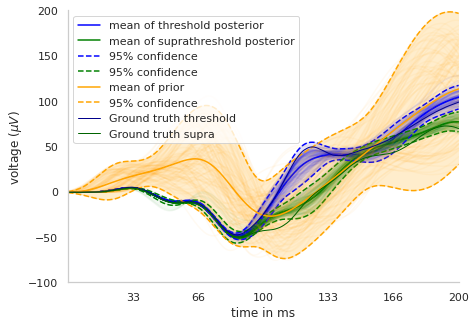

In [17]:
import seaborn as sns

sns.set() 

sns.set_style("whitegrid", {'axes.grid' : False})
#sns.set_style('ticks')

fig1, ax = plt.subplots(1, 1, figsize=(7,5))
#ax.set_title("Comparing signal")

    
plt.plot(mean_t, color ='blue', label='mean of threshold posterior')
plt.plot(mean_s, color ='green', label='mean of suprathreshold posterior')

for s in s_x_t:
    plt.plot(s, alpha=0.05, color='blue')
    #plt.ylim(-30,30)
    #plt.xlim(0, 5100)
    
for s in s_x_s:
    plt.plot(s, alpha=0.05, color='green')
    #plt.ylim(-30,30)
    #plt.xlim(0, 5100)

plt.plot(lower_t, color='blue', linestyle='dashed', label='95% confidence')
plt.plot(upper_t, color='blue', linestyle='dashed')
plt.fill_between(x= torch.arange(len(mean_prior)), y1=lower_t, y2=upper_t, color='blue', alpha=0.1)

plt.plot(lower_s, color='green', linestyle='dashed', label='95% confidence')
plt.plot(upper_s, color='green', linestyle='dashed')
plt.fill_between(x= torch.arange(len(mean_prior)), y1=lower_s, y2=upper_s, color='green', alpha=0.1)

#plt.xlim(0, 5100)
plt.ylim(-100, 200)


plt.plot(mean_prior, color ='orange', label='mean of prior')


for x_w in s_x_prior:
    plt.plot(x_w, alpha=0.05, color='orange')

plt.plot(lower_prior, color='orange', linestyle='dashed', label='95% confidence')
plt.plot(upper_prior, color='orange', linestyle='dashed')
plt.fill_between(x= torch.arange(len(mean_prior)), y1=lower_prior, y2=upper_prior, color='orange', alpha=0.2)
#plt.xlim(0, 6300)



plt.xlabel('time in ms')
#plt.ylabel('voltage ()')

fig1.gca().set_ylabel(r'voltage ($\mu V$)')
    
plt.plot(obs_real, color='darkblue', linewidth=1, linestyle='-', label='Ground truth threshold')
plt.plot(obs_real2, linestyle = '-', label='Ground truth supra', color='darkgreen', linewidth=1)


plt.xticks([1000, 2000, 3000, 4000, 5000, 6000],[33, 66, 100, 133, 166, 200])

plt.xlim(0, 6000)

sns.despine()
plt.legend()

In [18]:
plt.savefig('fig_4_12_ppc.png')

<Figure size 432x288 with 0 Axes>